# [고용조사분석시스템](https://survey.keis.or.kr/goms/gomsdownload/List.jsp)

- 대졸자들의 노동시장 진입과 정착 과정에 대한 실증적 자료가 요구됨에 따라  『대졸자직업이동경로조사』를 실시
- 대졸자의 교육과정, 구직활동, 일자리경험, 직업훈련, 자격증, 개인신상정보 및 가계배경 등 노동시장 진입 및 정착에 영향을 줄 수 있는 항목 조사

## 0. 환경셋팅
- 한글 세팅

In [1]:
# colab( ubuntu )
# (라이브러리 설치 후 런타임 재시작 필요)
# 터미널에서 하세요
# sudo apt-get update
# sudo apt-get install fonts-nanum*
# kernel 재시작

# mac
# https://wannabe00.tistory.com/entry/Mac%EC%97%90%EC%84%9C-Matplotlib-%EC%82%AC%EC%9A%A9-%EC%8B%9C-%ED%95%9C%EA%B8%80-%EA%B9%A8%EC%A7%90-%ED%95%B4%EA%B2%B0

In [2]:
import matplotlib as mpl
mpl.matplotlib_fname()

'C:\\Users\\ohminy\\anaconda3\\envs\\week4\\Lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

- C:\\Users\\ohminy\\anaconda3\\envs\\week4\\Lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'\mpl-data\\matplotlibrc 가 아니라 (\\ -> \ 로 변경해야함)
- \mpl-data\fonts\ttf 에 D2Coding~~~.ttf 파일 복사 

In [5]:
mpl.get_cachedir()
# 위의 결과로 나오는 디렉터리에 들어가서 fontlist-v330 파일 삭제 
# jupyter kernel 재시작 -> pandas 재 import 후 사용 

'C:\\Users\\ohminy\\.matplotlib'

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='D2Coding')

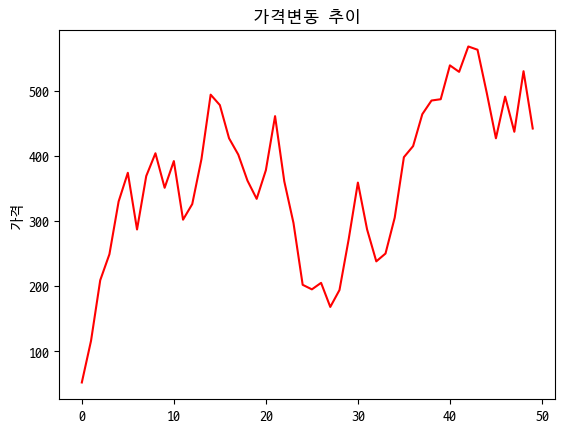

In [8]:
# test code
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randint(-100, 100, 50).cumsum()
data

plt.plot(range(50), data, 'r')
plt.title('가격변동 추이')
plt.ylabel('가격')
plt.show()

## 1. Load Datasets


### 1.1 라이브러리 불러오기
- numpy, pandas, plt, seaborn

### 1.2 데이터 불러오기
- pandas를 사용하여 dataframe 형태로 데이터를 불러옵니다. 데이터프레임을 담을 변수는 `df`로 설정한다.

- data : https://raw.githubusercontent.com/myoh0623/dataset/main/GOMS2019.csv
- columns : https://raw.githubusercontent.com/myoh0623/dataset/main/GOMS2019_columns.csv

In [9]:
url_data = "https://raw.githubusercontent.com/myoh0623/dataset/main/GOMS2019.csv"
url_columns = "https://raw.githubusercontent.com/myoh0623/dataset/main/GOMS2019_columns.csv"

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv(url_data)
df_columns = pd.read_csv(url_columns)

In [13]:
df.shape

(11652, 130)

In [22]:
df.head()

,이직여부,majorcat,school,area,sex,age,graduy,a001,industry,job,...,p039,p041,p043,p045,r023,r024,r025,r026,r027,wt
0,2,1,1,8,1,21.750000,2018,2018,7,7,...,1008,2,2,6,30,0,0,0,1,20.945343
1,1,1,1,8,1,25.250000,2018,2018,7,1,...,540,2,2,3,60,10,0,10,1,19.420393
2,2,1,1,8,1,24.500000,2018,2018,9,1,...,1570,2,2,2,30,0,0,0,1,19.420393
3,2,1,1,10,1,26.000000,2018,2018,3,7,...,1560,2,1,2,150,35,0,0,1,11.549823
4,2,1,1,1,2,25.083333,2017,2019,7,7,...,0,2,-1,1,120,50,0,0,1,37.668984


### 1.3 데이터 전처리
- 데이터프레임 `df`의 컬럼명을 변경

In [17]:
df.columns

Index(['이직여부', 'majorcat', 'school', 'area', 'sex', 'age', 'graduy', 'a001',
       'industry', 'job',
       ...
       'p039', 'p041', 'p043', 'p045', 'r023', 'r024', 'r025', 'r026', 'r027',
       'wt'],
      dtype='object', length=130)

In [20]:
df_columns.loc[:, ["columns", "desc"]].values

array([['majorcat', '전공계열'],
       ['school', '학교유형'],
       ['area', '학교소재지'],
       ['sex', '성별'],
       ['age', '연령'],
       ['graduy', '졸업년'],
       ['a001', '현 일자리 시작년'],
       ['a010', '기업체 종사자 수'],
       ['a011', '사업체 종사자 수'],
       ['a012', '사업체 위치(국내/국외)'],
       ['a014', '사업체 위치(시도)'],
       ['a016', '교통수단'],
       ['a018', '출근시간'],
       ['a020', '사업체 형태'],
       ['a021', '종사상 지위'],
       ['a116', '정규 근로일'],
       ['a117', '주당 정규 근로시간'],
       ['a118', '주당 초과 근로시간'],
       ['a119', '월평균 휴일 근로'],
       ['a122', '월평균 근로소득_만원'],
       ['a125', '초임 월평균 근로소득_만원'],
       ['a126', '만족도-임금'],
       ['a127', '만족도-고용 안정성'],
       ['a128', '만족도-직무내용'],
       ['a129', '만족도-근무환경'],
       ['a130', '만족도-근로시간'],
       ['a131', '만족도-개인 발전 가능성'],
       ['a132', '만족도-인간관계'],
       ['a133', '만족도-복리 후생'],
       ['a134', '만족도-인사체계(승진 제도)'],
       ['a135', '만족도-일에 대한 사회적 평판'],
       ['a136', '만족도-자율성과 권한'],
       ['a137', '만족도-일자리에 대한 사회적 평판'],
       ['a138', '만족도-

In [24]:
col_name = df_columns.loc[:, ["columns", "desc"]].values

In [25]:
df.rename(columns= dict(col_name), inplace=True)

In [29]:
job_ind = {"21": "industry", "10":"job"}

In [30]:
df.rename(columns= job_ind, inplace=True)

In [31]:
df

,이직여부,전공계열,학교유형,학교소재지,성별,연령,졸업년,현 일자리 시작년,industry,job,...,지난 해 소득_만원,가족에게 경제적 지원을 받고 있는지 여부,가족에게 경제적 지원을 하고 있는지 여부,군 복무 경험,전년도 월평균 생활비 지출액,전년도 월평균 주거비 지출액,전년도 월평균 공교육비 지출액,전년도 월평균 사교육비 지출액,생활비 충당 방식,wt
0,2,1,1,8,1,21.750000,2018,2018,7,7,...,1008,2,2,6,30,0,0,0,1,20.945343
1,1,1,1,8,1,25.250000,2018,2018,7,1,...,540,2,2,3,60,10,0,10,1,19.420393
2,2,1,1,8,1,24.500000,2018,2018,9,1,...,1570,2,2,2,30,0,0,0,1,19.420393
3,2,1,1,10,1,26.000000,2018,2018,3,7,...,1560,2,1,2,150,35,0,0,1,11.549823
4,2,1,1,1,2,25.083333,2017,2019,7,7,...,0,2,-1,1,120,50,0,0,1,37.668984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11647,2,7,2,3,2,24.000000,2018,2018,16,3,...,1440,2,2,1,50,0,0,0,1,45.471141
11648,2,7,2,1,2,25.833333,2017,2018,15,1,...,1600,2,2,1,40,0,0,0,1,19.295745
11649,2,7,2,1,2,25.083333,2018,2018,16,3,...,1500,2,1,1,70,0,0,0,1,31.941780
11650,2,7,2,1,1,26.750000,2018,2019,7,7,...,2000,2,2,2,100,9,0,0,1,19.143188


```
-1	모름/무응답
1	농업, 임업 및 어업
2	광업
3	제조업
4	전기, 가스, 증기 및 공기 조절 공급업
5	수도, 하수 및 폐기물 처리, 원료 재생업
6	건설업
7	도매 및 소매업
8	운수 및 창고업
9	숙박 및 음식점업
10	정보통신업
11	금융 및 보험업
12	부동산업
13	전문, 과학 및 기술 서비스업
14	사업시설 관리, 사업 지원 및 임대 서비스업
15	공공 행정, 국방 및 사회보장 행정
16	교육 서비스업
17	보건업 및 사회복지 서비스업
18	예술, 스포츠 및 여가관련 서비스업
19	협회 및 단체, 수리 및 기타 개인 서비스업
20	가구 내 고용활동 및 달리 분류되지 않은 자가 소비 생산활동
21	국제 및 외국기관
```

```
-1	 모름/무응답
1	 경영·사무·금융·보험직
2	 연구직 및 공학 기술직
3	 교육·법률·사회복지·경찰·소방직 및 군인
4	 보건·의료직
5	 예술·디자인·방송·스포츠직
6	 미용·여행·숙박·음식·경비·청소직
7	 영업·판매·운전·운송직
8	 건설·채굴직
9	 설치·정비·생산직
10	 농림어업직

```

```
1. 인문계열
2. 사회계열
3. 교육계열
4. 공학계열
5. 자연계열
6. 의약계열
7. 예체능계열
```

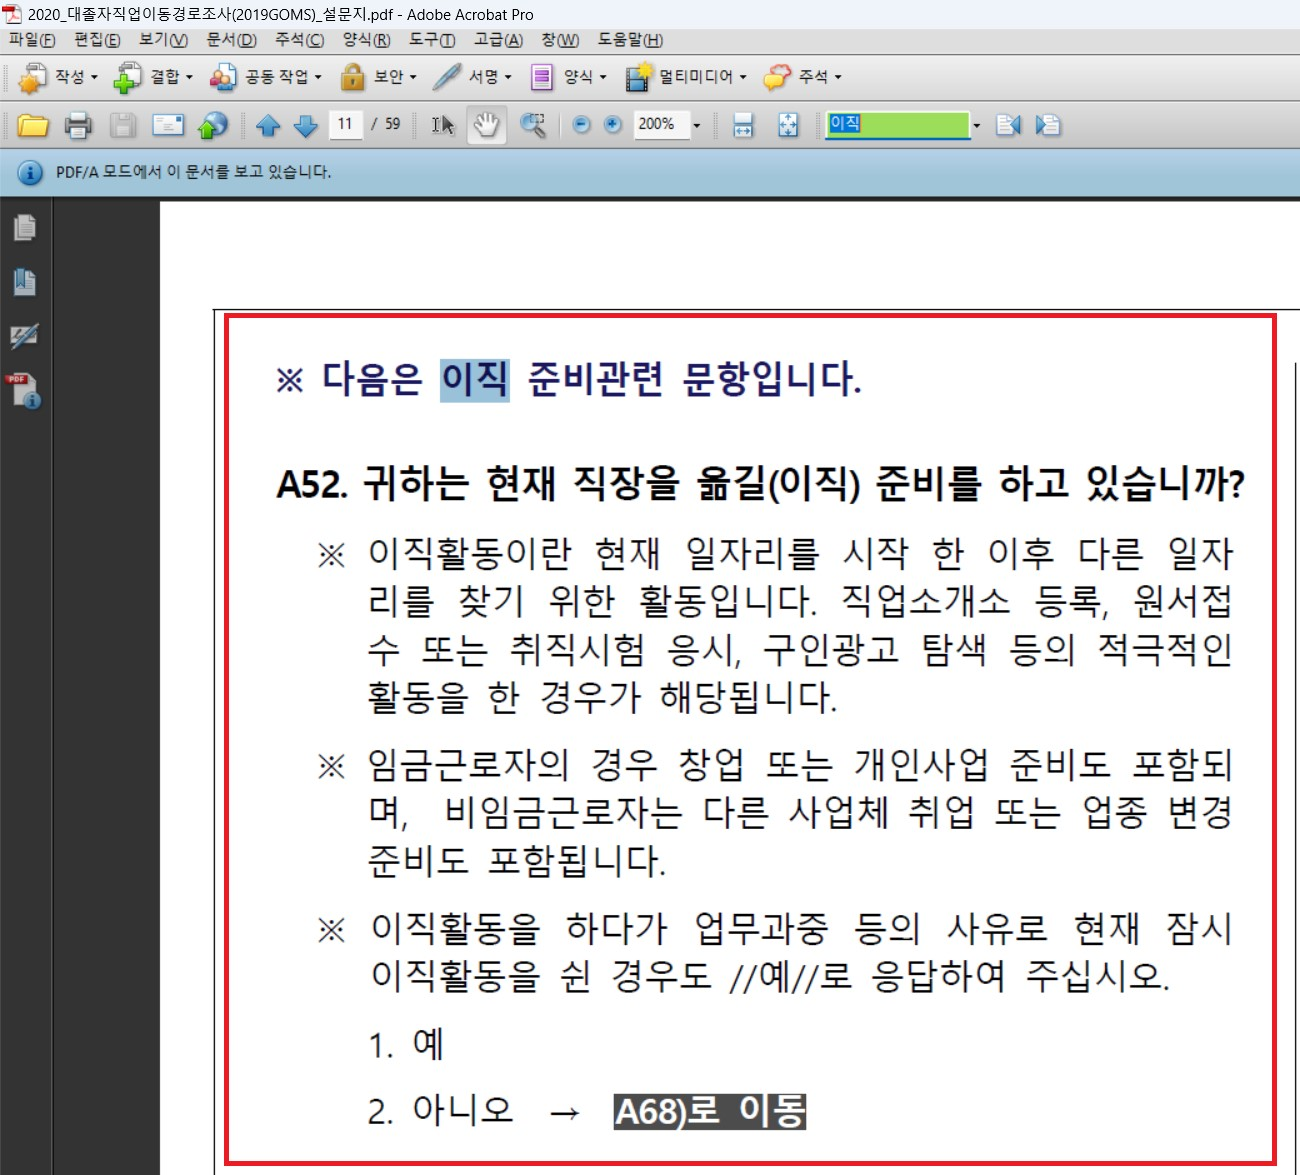

In [32]:
# 변경된 컬럼 
# 예 : a001' -> '현 일자리 시작년' 
df.columns

Index(['이직여부', '전공계열', '학교유형', '학교소재지', '성별', '연령', '졸업년', '현 일자리 시작년',
       'industry', 'job',
       ...
       '지난 해 소득_만원', '가족에게 경제적 지원을 받고 있는지 여부', '가족에게 경제적 지원을 하고 있는지 여부',
       '군 복무 경험', '전년도 월평균 생활비 지출액', '전년도 월평균 주거비 지출액', '전년도 월평균 공교육비 지출액',
       '전년도 월평균 사교육비 지출액', '생활비 충당 방식', 'wt'],
      dtype='object', length=130)

In [33]:
df.head() #21 번은  industry 재변경, 10 은 job 으로 변경 하셔도 되고 안하셔도 됩니다. 

,이직여부,전공계열,학교유형,학교소재지,성별,연령,졸업년,현 일자리 시작년,industry,job,...,지난 해 소득_만원,가족에게 경제적 지원을 받고 있는지 여부,가족에게 경제적 지원을 하고 있는지 여부,군 복무 경험,전년도 월평균 생활비 지출액,전년도 월평균 주거비 지출액,전년도 월평균 공교육비 지출액,전년도 월평균 사교육비 지출액,생활비 충당 방식,wt
0,2,1,1,8,1,21.750000,2018,2018,7,7,...,1008,2,2,6,30,0,0,0,1,20.945343
1,1,1,1,8,1,25.250000,2018,2018,7,1,...,540,2,2,3,60,10,0,10,1,19.420393
2,2,1,1,8,1,24.500000,2018,2018,9,1,...,1570,2,2,2,30,0,0,0,1,19.420393
3,2,1,1,10,1,26.000000,2018,2018,3,7,...,1560,2,1,2,150,35,0,0,1,11.549823
4,2,1,1,1,2,25.083333,2017,2019,7,7,...,0,2,-1,1,120,50,0,0,1,37.668984


## 2. 데이터 시각화

### 2.1 월평균 근로소득 분포
-  1000만원 이하의 월평균 근로소득의 분포를 히스토그램으로 그리고 평균과 중앙값을 선으로 표시하세요

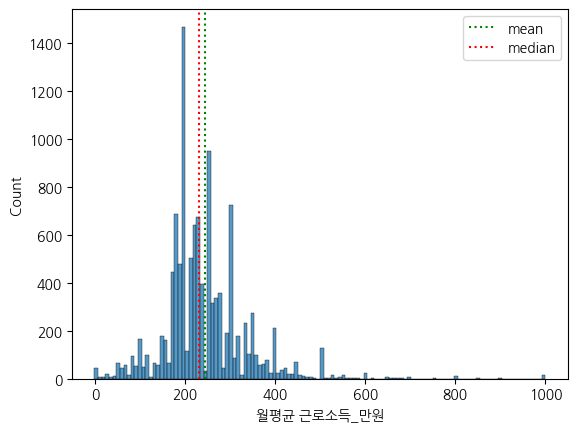

### 2.2 전공계열에 따른 월평균 근로소득 분포
- 전공계열에 따른 월평균 근로소득의 분포를 바이올린 플롯으로 그리고, 이직여부를 구분하여 그리십시오.(sns.violinplot)

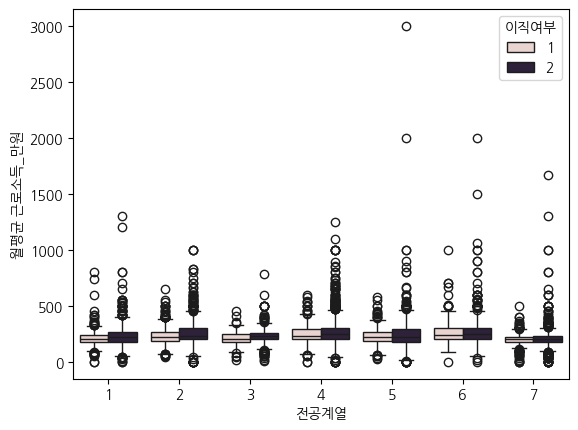

In [72]:
# 인문1, 사회2, 교육3, 공학4, 자연5, 의약6, 예체능7


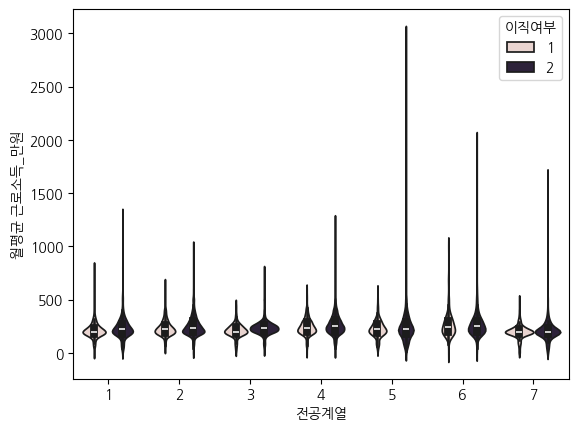

In [74]:
# 인문1, 사회2, 교육3, 공학4, 자연5, 의약6, 예체능7


### 2.3 주당 정규 근로시간에 따른 월평균 근로소득 분포
- 주당 정규 근로시간에 따른 월평균 근로소득의 분포를 산점도로 표현하십시오.

<Axes: xlabel='주당 정규 근로시간', ylabel='월평균 근로소득_만원'>

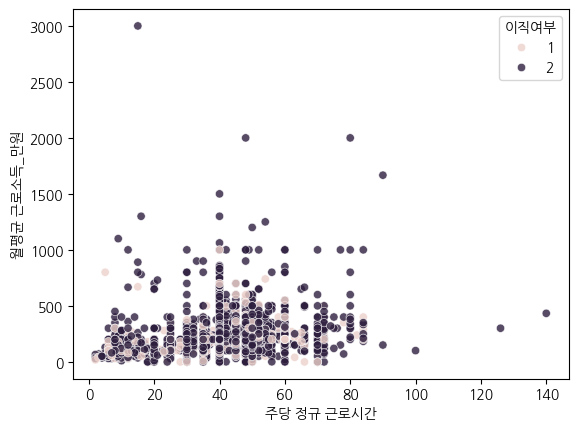

In [78]:
sns.scatterplot(data=df, x="주당 정규 근로시간", y=salary_columns, alpha=0.8, hue="이직여부")

### 2.4 월평균 근로소득에 영향을 미치는 변수
- '월평균 근로소득_만원', '주당 정규 근로시간', '졸업 평점', '전반적 만족도(직장)'의 쌍별 관계를 pairplot을 이용해 시각화하고, 이직여부를 구분하여 그리십시오.
-  월 근로소득 1000만원 이하만 조사한다

In [86]:
# corr() 확인

,월평균 근로소득_만원,주당 정규 근로시간,졸업 평점,전반적 만족도(직장)
월평균 근로소득_만원,1.000000,0.156557,0.036758,0.112107
주당 정규 근로시간,0.156557,1.000000,-0.037184,-0.049059
졸업 평점,0.036758,-0.037184,1.000000,0.078856
전반적 만족도(직장),0.112107,-0.049059,0.078856,1.000000


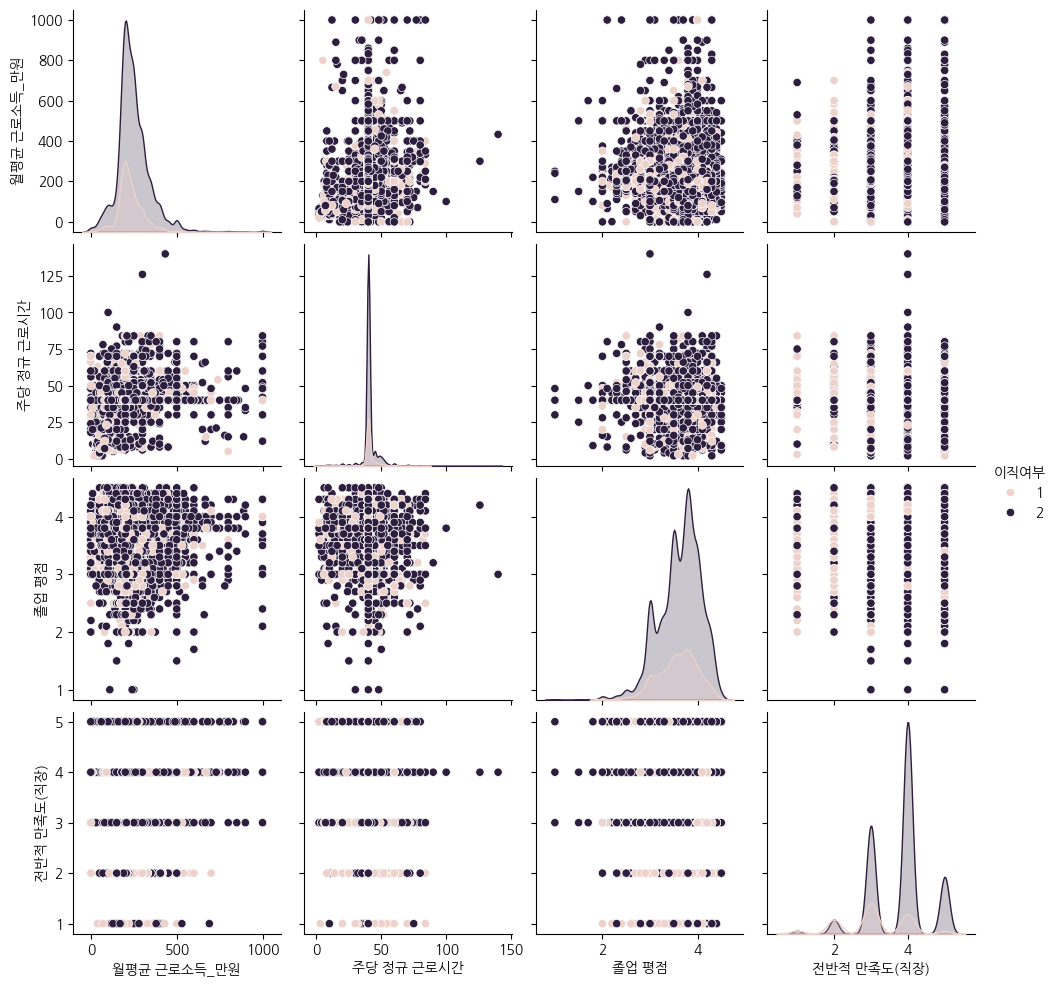

### 2.5 전공계열의 분포
- 전공계열의 분포를 막대그래프와 파이차트로 각각 표현하십시오.

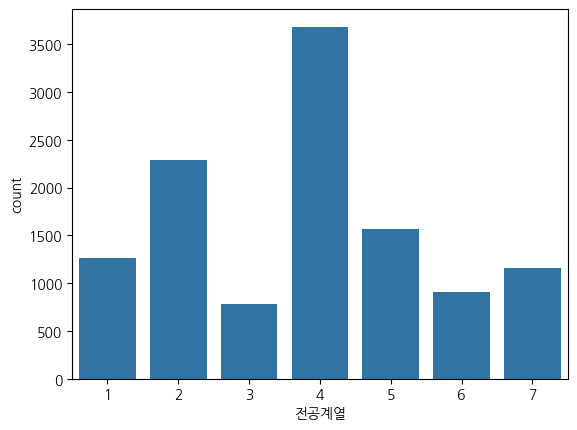

### 2.6 이직여부의 분포
- 이직여부의 분포를 막대그래프와 파이차트로 각각 표현하십시오.

<Axes: xlabel='이직여부', ylabel='count'>

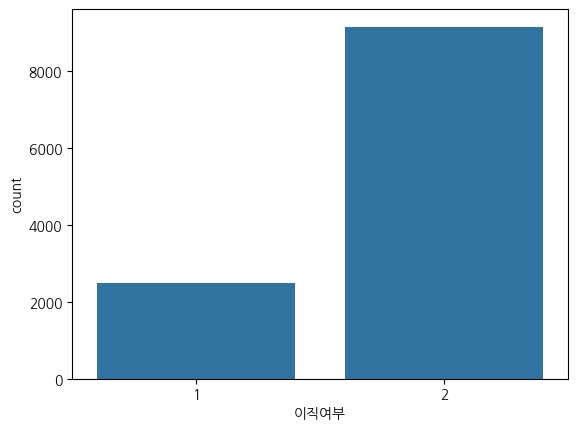

([<matplotlib.patches.Wedge at 0x1b084b79b40>,
 [Text(-0.8596182571665362, 0.6863355243217177, '이직x'),
  Text(0.8596182571665364, -0.6863355243217174, '이직o')],
 [Text(-0.4688826857272015, 0.37436483144820965, '78.55%'),
  Text(0.4688826857272016, -0.3743648314482094, '21.45%')])

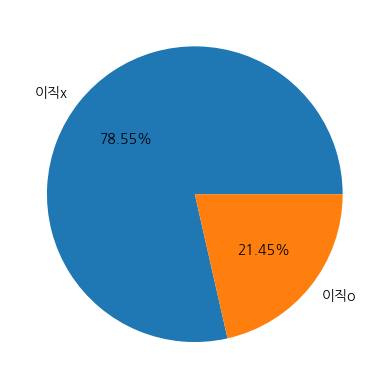

<Axes: xlabel='이직여부', ylabel='count'>

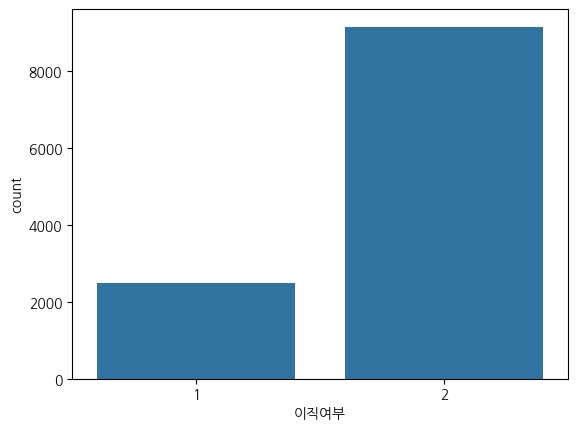